# SUMMER ANALYTICS 2024



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\91628\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('Cars.csv')


In [23]:
# Agar df aapka DataFrame hai jisme 'name' index ban chuka hai:
df_reset = df.reset_index()

# Ab dekh lo columns:
print(df_reset.columns)


Index(['hp_per_weight', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'model_year', 'origin'],
      dtype='object')


In [25]:
df = df.reset_index()


In [26]:
print(df.columns)


Index(['hp_per_weight', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'model_year', 'origin'],
      dtype='object')


In [21]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
hp_per_weight,,,,,,,,
0.037100,18.0,8,307.0,130.0,3504,12.0,70,usa
0.044679,15.0,8,350.0,165.0,3693,11.5,70,usa
0.043655,18.0,8,318.0,150.0,3436,11.0,70,usa
0.043694,16.0,8,304.0,150.0,3433,12.0,70,usa
0.040591,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
0.030824,27.0,4,140.0,86.0,2790,15.6,82,usa
0.024413,44.0,4,97.0,52.0,2130,24.6,82,europe
0.036601,32.0,4,135.0,84.0,2295,11.6,82,usa


In [3]:
print(df.shape)


(398, 9)


In [4]:
print(df.columns.values)


['mpg' 'cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin' 'name']


In [5]:
df.set_index('name', inplace=True)


In [6]:
unique_mpg = df['mpg'].unique()
print(unique_mpg)


[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


In [7]:
df['hp_per_weight'] = df['horsepower'] / df['weight']
df.set_index('hp_per_weight', inplace=True)


In [20]:
max_hp_car = df['horsepower'].idxmax()
print(max_hp_car)


0.053763440860215055


In [9]:
count_mpg_35 = df[df['mpg'] >= 35].shape[0]
print(count_mpg_35)


36


In [10]:
filtered = df[(df['horsepower'] > 100) & (df['weight'] < 3000)]
most_common_origin = filtered['origin'].mode()[0]
print(most_common_origin)


usa


In [11]:
mean_accel_japan = round(df[df['origin'] == 'japan']['acceleration'].mean(), 2)
print(mean_accel_japan)


16.17


In [12]:
year_max_mpg = df.groupby('model_year')['mpg'].mean().idxmax()
print(year_max_mpg)


80


In [13]:
median_mpg = df['mpg'].median()
filtered = df[df['mpg'] > median_mpg]
best_ratio = filtered['horsepower'] / filtered['weight']
best_cars = filtered.loc[best_ratio.idxmax()]
print(best_cars)


mpg               26.0
cylinders            4
displacement     121.0
horsepower       113.0
weight            2234
acceleration      12.5
model_year          70
origin          europe
Name: 0.050581915846016116, dtype: object


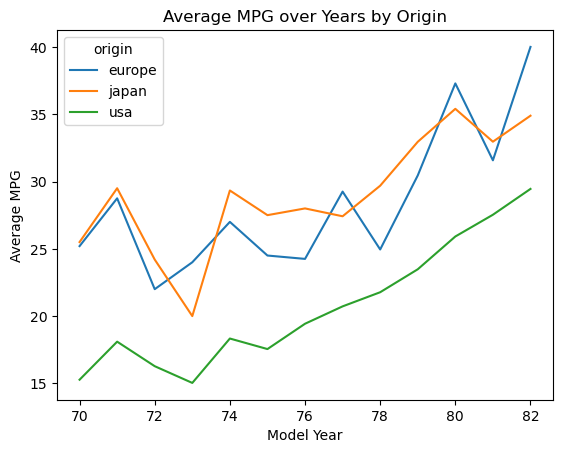

In [14]:
avg_mpg_origin_year = df.groupby(['model_year', 'origin'])['mpg'].mean().unstack()
avg_mpg_origin_year.plot()
plt.title('Average MPG over Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.show()


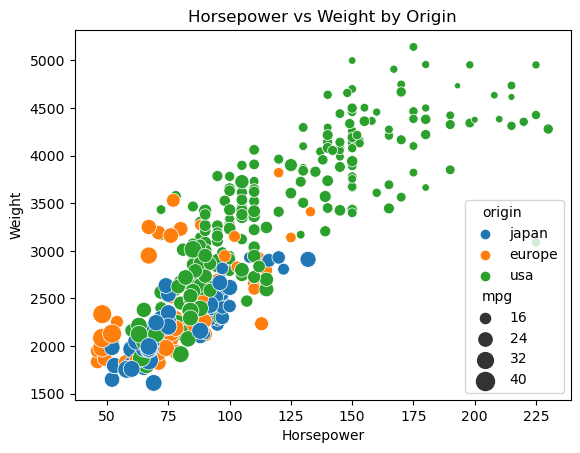

In [15]:
sns.scatterplot(data=df.reset_index(), x='horsepower', y='weight', hue='origin',
                size='mpg', hue_order=['japan', 'europe', 'usa'], sizes=(20, 200))
plt.title('Horsepower vs Weight by Origin')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()
